In [1]:
import mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-v0_8')
from matplotlib import colormaps
print(plt.style.available)
list(colormaps)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [3]:
a = mr.MesaData('Work/tutorial/LOGS/history.data')
l = mr.MesaLogDir('Work/tutorial//LOGS')


# load the profile with PROFILE number 12
p_1 = l.profile_data(profile_number=1)

# load the last profile saved (largest model number)
p_2 = l.profile_data()


In [8]:
# Access the columns in the history file
center_he4 = a.center_he4  # Central helium mass fraction
star_age =  a.star_age      # Star age in years

# Find the first instance where the central helium fraction increases significantly
# This marks the onset of helium burning in the core
helium_burning_start_index = next((i for i, he4 in enumerate(center_he4) if he4 > 0.1), None)  # Adjust threshold as necessary

if helium_burning_start_index is not None:
    age_at_helium_burning = star_age[helium_burning_start_index]
    print(f"The star reaches helium core burning at approximately {age_at_helium_burning:.2e} years.")
else:
    print("Helium burning phase not reached in the provided data.")

The star reaches helium core burning at approximately 6.49e+02 years.


# Question 1.

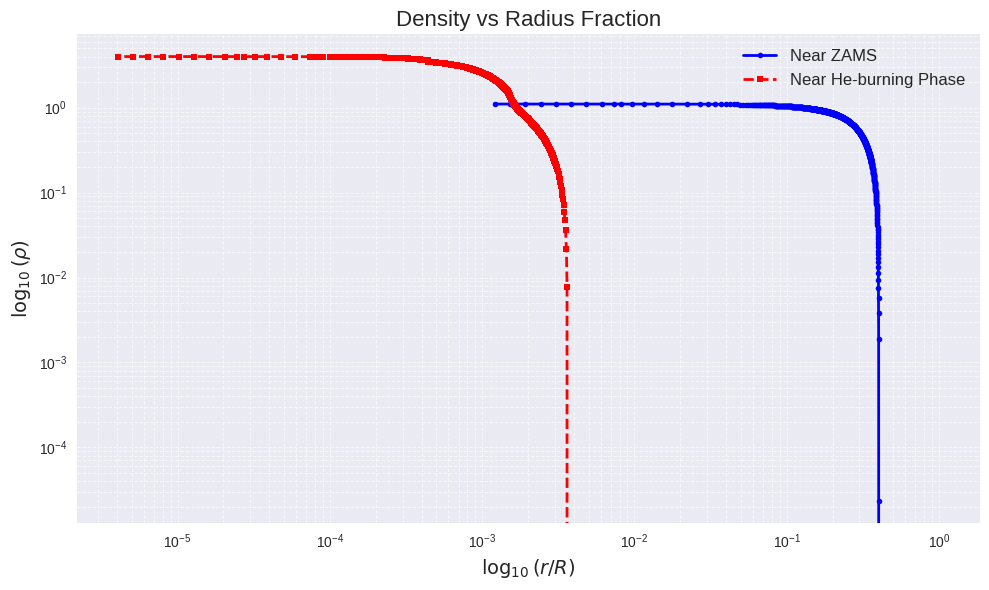

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p_1 and p_2 are already defined and contain r_div_R and logRho

plt.figure(figsize=(10, 6))

# Plot for ZAMS
plt.plot(p_1.r_div_R, p_1.logRho, label='Near ZAMS', color='blue', linestyle='-', marker='o', markersize=4, linewidth=2)

# Plot for He-burning phase
plt.plot(p_2.r_div_R, p_2.logRho, label='Near He-burning Phase', color='red', linestyle='--', marker='s', markersize=4, linewidth=2)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid with light lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Set logarithmic scale for x and y axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel(r'$\log_{10}(r/R)$', fontsize=14)
plt.ylabel(r'$\log_{10}(\rho)$', fontsize=14)
plt.title('Density vs Radius Fraction', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


# Question 2.

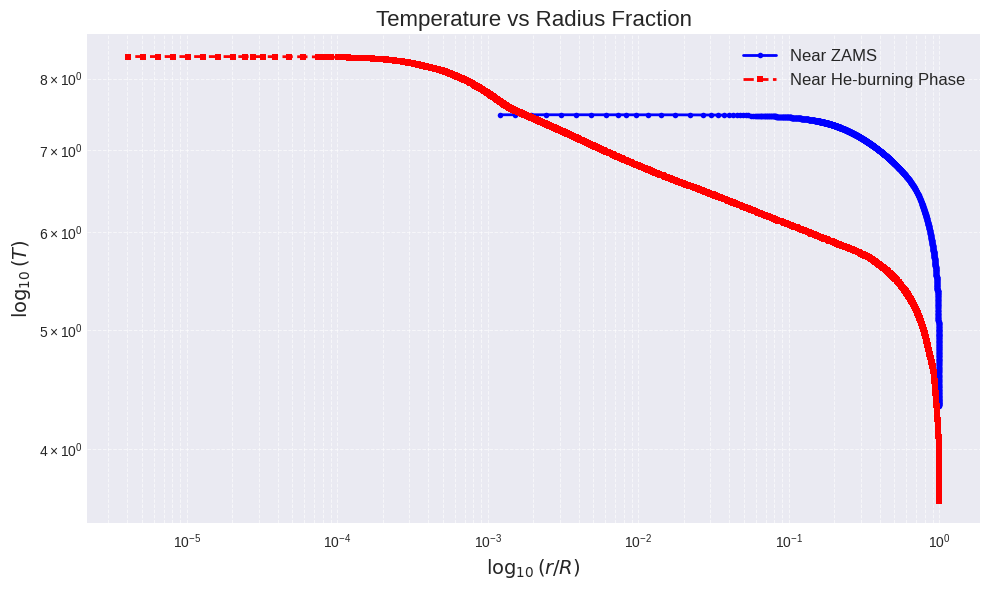

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p_1 and p_2 are already defined and contain r_div_R and logT

plt.figure(figsize=(10, 6))

# Plot for ZAMS
plt.plot(p_1.r_div_R, p_1.logT, label='Near ZAMS', color='blue', linestyle='-', marker='o', markersize=4, linewidth=2)

# Plot for He-burning phase
plt.plot(p_2.r_div_R, p_2.logT, label='Near He-burning Phase', color='red', linestyle='--', marker='s', markersize=4, linewidth=2)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid with light lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Set logarithmic scale for x and y axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel(r'$\log_{10}(r/R)$', fontsize=14)
plt.ylabel(r'$\log_{10}(T)$', fontsize=14)
plt.title('Temperature vs Radius Fraction', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


# Question 3.

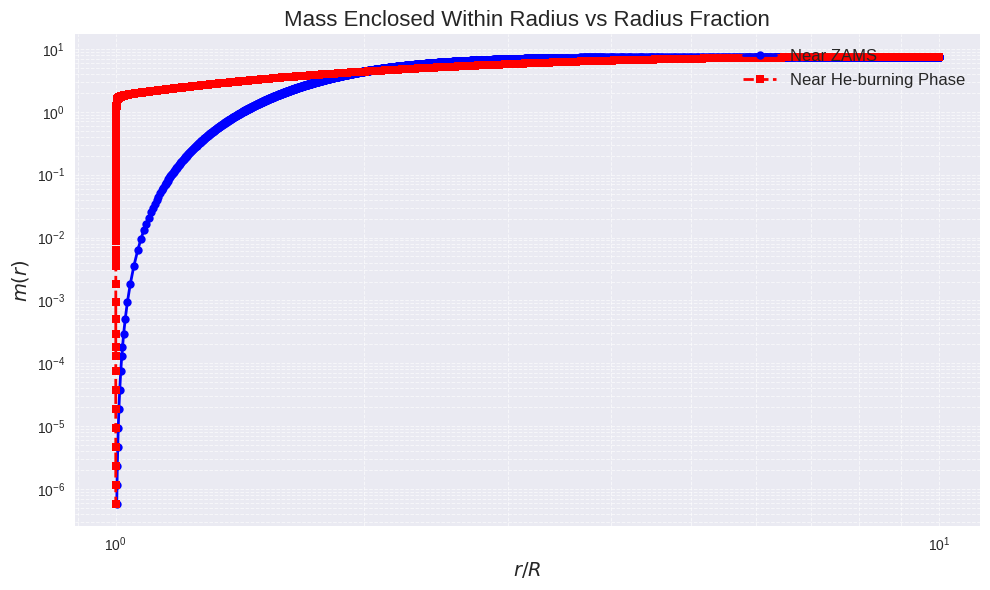

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p_1 and p_2 are already defined and contain r_div_R and mass

plt.figure(figsize=(10, 6))

# Plot for ZAMS
plt.plot(10**p_1.r_div_R, p_1.mass, label='Near ZAMS', color='blue', linestyle='-', marker='o', markersize=6, linewidth=2)

# Plot for He-burning phase
plt.plot(10**p_2.r_div_R, p_2.mass, label='Near He-burning Phase', color='red', linestyle='--', marker='s', markersize=6, linewidth=2)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid with light lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Set logarithmic scale for x and y axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel(r'$r/R$', fontsize=14)
plt.ylabel(r'$m(r)$', fontsize=14)
plt.title('Mass Enclosed Within Radius vs Radius Fraction', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


# Question 4.

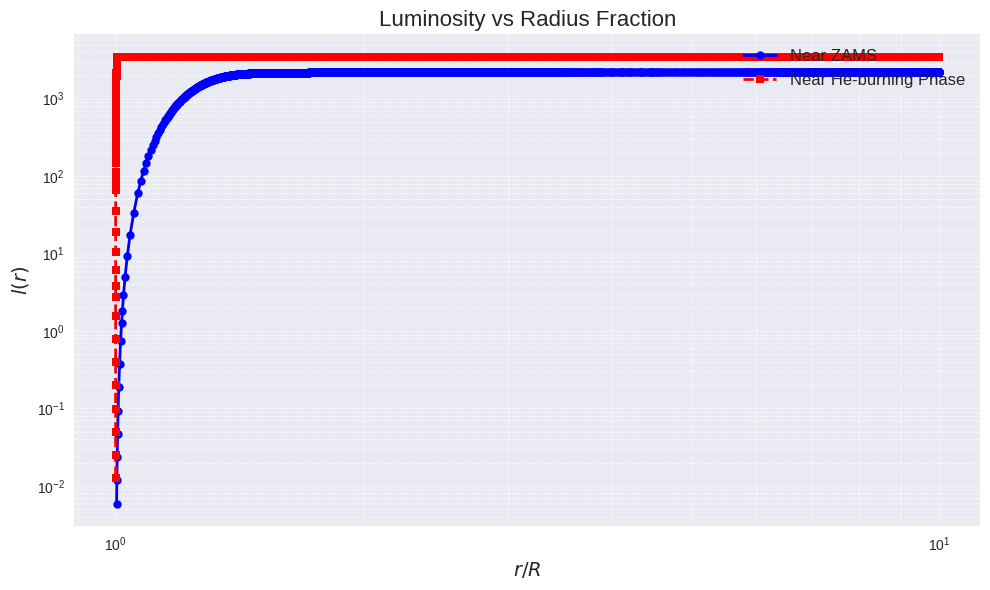

In [34]:
import matplotlib.pyplot as plt

# Assuming p_1 and p_2 are already defined and contain r_div_R and luminosity

plt.figure(figsize=(10, 6))

# Plot for ZAMS
plt.plot(10**p_1.r_div_R, p_1.luminosity, label='Near ZAMS', color='blue', linestyle='-', marker='o', markersize=6, linewidth=2)

# Plot for He-burning phase
plt.plot(10**p_2.r_div_R, p_2.luminosity, label='Near He-burning Phase', color='red', linestyle='--', marker='s', markersize=6, linewidth=2)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid with light lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Set logarithmic scale for x and y axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel(r'$r/R$', fontsize=14)
plt.ylabel(r'$l(r)$', fontsize=14)
plt.title('Luminosity vs Radius Fraction', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


# Question 5.

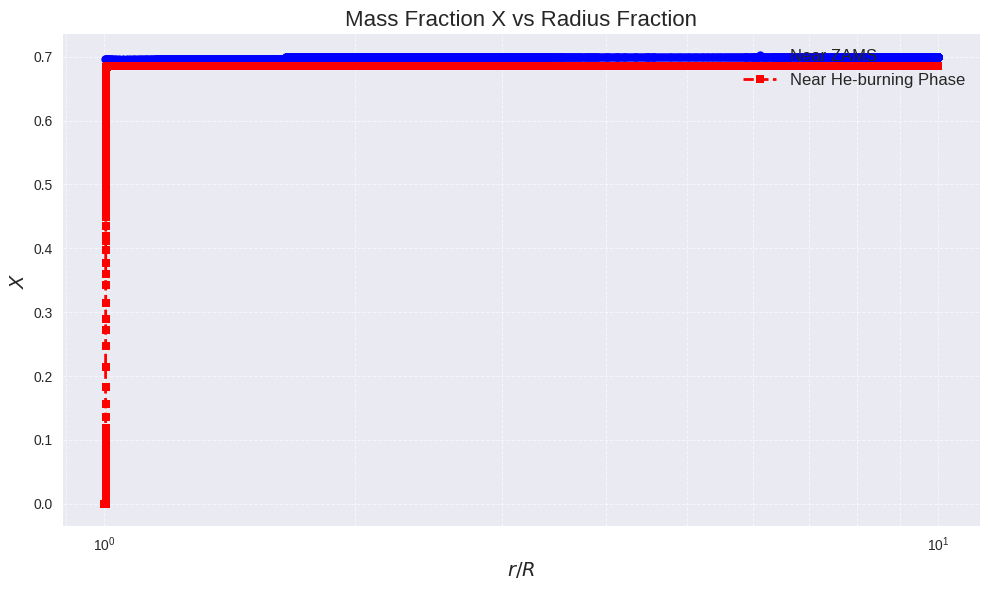

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p_1 and p_2 are already defined and contain r_div_R and x

plt.figure(figsize=(10, 6))

# Plot for ZAMS
plt.plot(10**p_1.r_div_R, p_1.x, label='Near ZAMS', color='blue', linestyle='-', marker='o', markersize=6, linewidth=2)

# Plot for He-burning phase
plt.plot(10**p_2.r_div_R, p_2.x, label='Near He-burning Phase', color='red', linestyle='--', marker='s', markersize=6, linewidth=2)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid with light lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Set logarithmic scale for x-axis and linear scale for y-axis
plt.xscale('log')
plt.xlabel(r'$r/R$', fontsize=14)
plt.ylabel(r'$X$', fontsize=14)

# Add title
plt.title('Mass Fraction X vs Radius Fraction', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


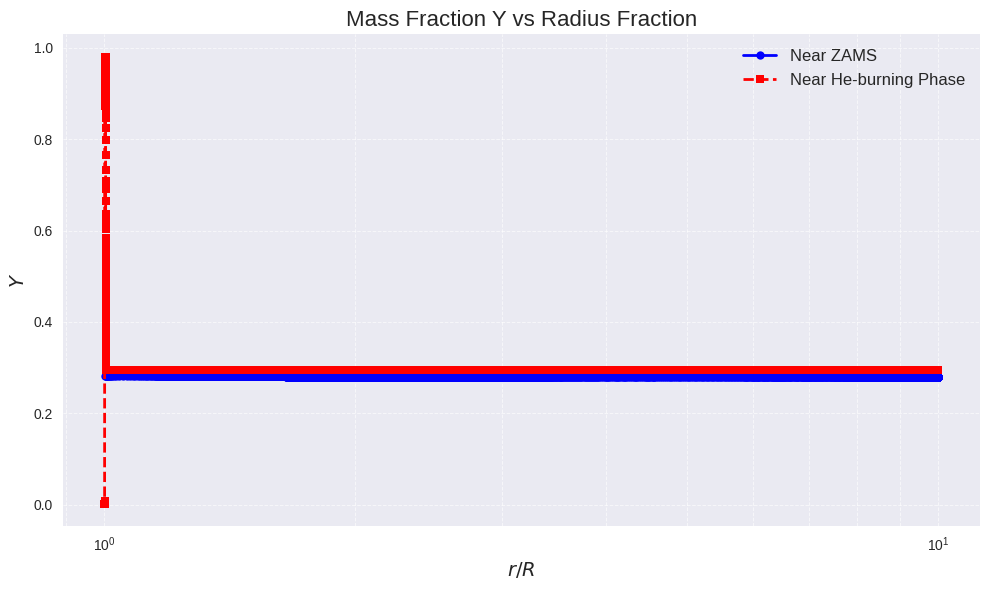

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p_1 and p_2 are already defined and contain r_div_R and y

plt.figure(figsize=(10, 6))

# Plot for ZAMS
plt.plot(10**p_1.r_div_R, p_1.y, label='Near ZAMS', color='blue', linestyle='-', marker='o', markersize=6, linewidth=2)

# Plot for He-burning phase
plt.plot(10**p_2.r_div_R, p_2.y, label='Near He-burning Phase', color='red', linestyle='--', marker='s', markersize=6, linewidth=2)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid with light lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Set logarithmic scale for x-axis and linear scale for y-axis
plt.xscale('log')
plt.xlabel(r'$r/R$', fontsize=14)
plt.ylabel(r'$Y$', fontsize=14)

# Add title
plt.title('Mass Fraction Y vs Radius Fraction', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


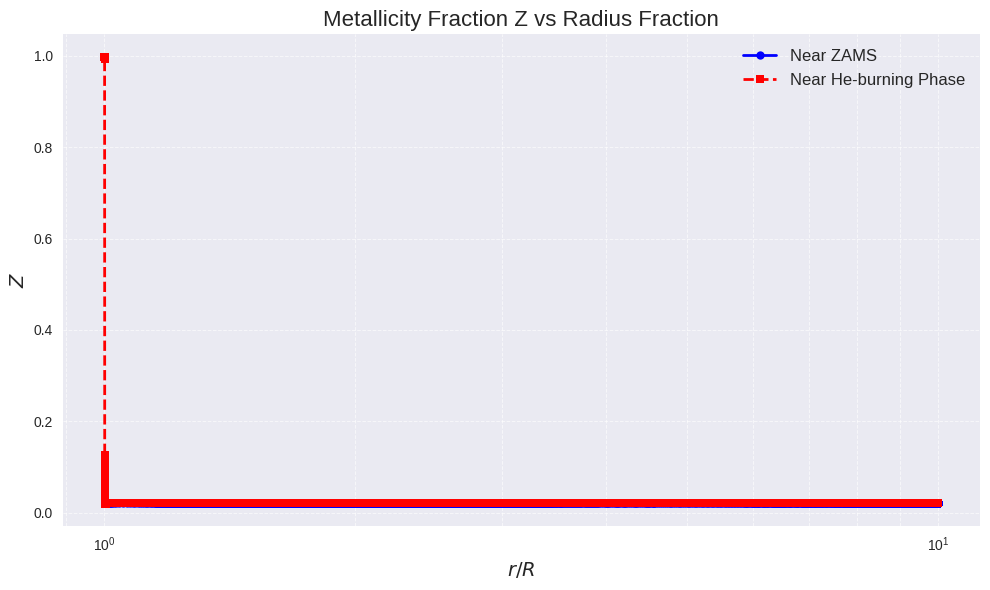

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p_1 and p_2 are already defined and contain r_div_R and z

plt.figure(figsize=(10, 6))

# Plot for ZAMS
plt.plot(10**p_1.r_div_R, p_1.z, label='Near ZAMS', color='blue', linestyle='-', marker='o', markersize=6, linewidth=2)

# Plot for He-burning phase
plt.plot(10**p_2.r_div_R, p_2.z, label='Near He-burning Phase', color='red', linestyle='--', marker='s', markersize=6, linewidth=2)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid with light lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Set logarithmic scale for x-axis and linear scale for y-axis
plt.xscale('log')
plt.xlabel(r'$r/R$', fontsize=14)
plt.ylabel(r'$Z$', fontsize=14)

# Add title
plt.title('Metallicity Fraction Z vs Radius Fraction', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


# Question 6.

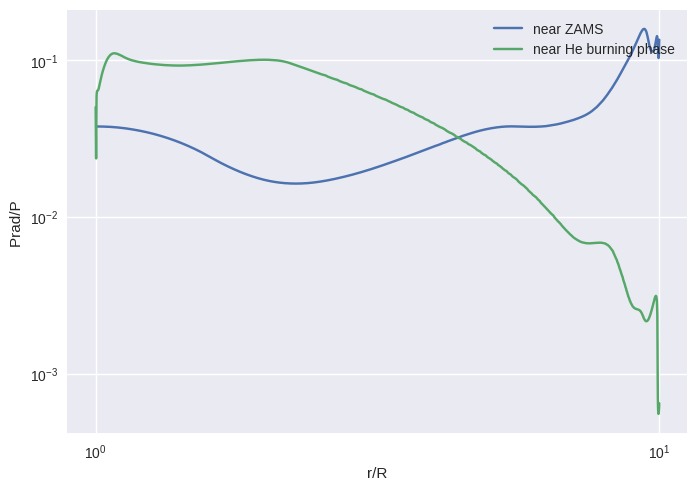

In [47]:
plt.plot(10**(p_1.r_div_R),p_1.prad/p_1.pressure,label='near ZAMS')
plt.plot(10**(p_2.r_div_R),p_2.prad/p_2.pressure,label='near He burning phase')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r/R')
plt.ylabel('Prad/P ')
plt.show()

# Question 7.

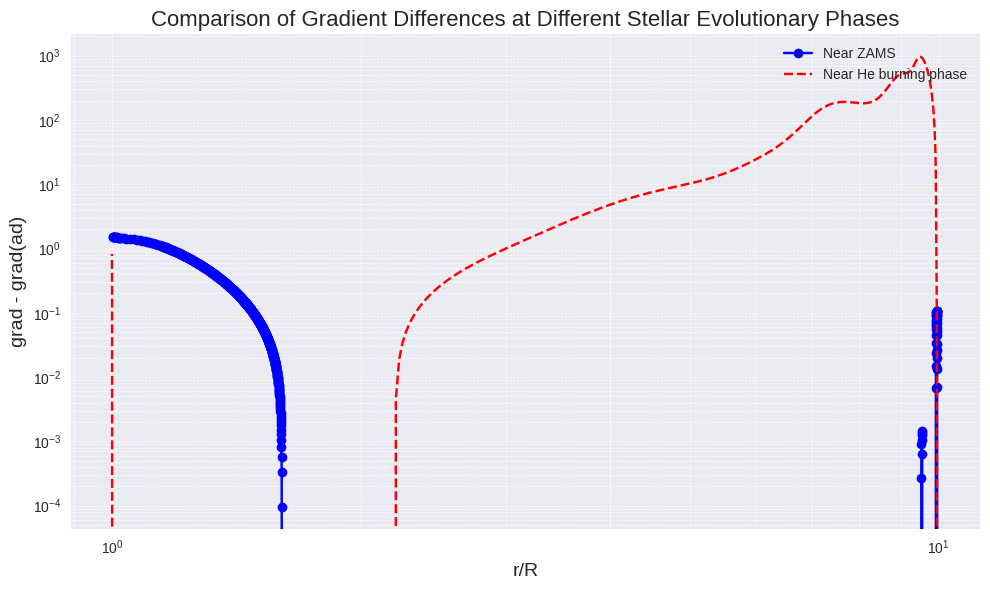

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(10**(p_1.r_div_R), p_1.gradr_sub_grada, label='Near ZAMS', color='blue', linestyle='-', marker='o')
plt.plot(10**(p_2.r_div_R), p_2.gradr_sub_grada, label='Near He burning phase', color='red', linestyle='--', marker='x')

# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding legend
plt.legend(loc='upper right')

# Setting logarithmic scales
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.xlabel('r/R', fontsize=14)
plt.ylabel('grad - grad(ad)', fontsize=14)
plt.title('Comparison of Gradient Differences at Different Stellar Evolutionary Phases', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()
